In [1]:
using LinearAlgebra  # Import necessary library for linear algebra operations
using FFTW

In [2]:
include("_support/operations.jl")

norm (generic function with 8 methods)

In [3]:
j = √Complex(-1);

In [4]:

# Define two complex vectors
# u = [1 + j
#     ;1 - j]
# v = [ 1 - j
#     ,-1 - j]

u = [1 + j, -2 + 2j]
v = [2 - 2j, 1 + j]

# Compute the Hermitian (conjugate) transpose of the first vector
uᴴ = (u)ᴴ  # This performs the conjugate transpose operation
@show uᴴ, typeof(uᴴ)
@show v, typeof(v)

# Calculate the dot product using the Hermitian transpose
uᴴv = uᴴ ⋅ v

# Check orthogonality
if uᴴv == 0
    println("The vectors u and v are orthogonal.")
else
    println("The vectors u and v are not orthogonal.")
end

# Output the dot product for verification
println("Dot product (should be zero for orthogonality): ", uᴴv)


(uᴴ, typeof(uᴴ)) = (ComplexF64[1.0 - 1.0im -2.0 - 2.0im], Adjoint{ComplexF64, Vector{ComplexF64}})
(v, typeof(v)) = (ComplexF64[2.0 - 2.0im, 1.0 + 1.0im], Vector{ComplexF64})
The vectors u and v are orthogonal.
Dot product (should be zero for orthogonality): 0.0 + 0.0im


In [5]:
using Plots  # Import the Plots package

In [6]:
# Function to extract real and imaginary parts
function complex_to_points(v)
    reals = [real(x) for x in v]
    imags = [imag(x) for x in v]
    return reals, imags
end


complex_to_points (generic function with 1 method)

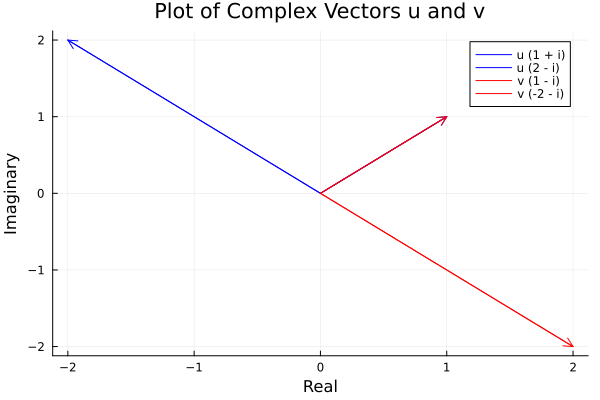

In [7]:
# Prepare data for plotting
u_reals, u_imags = complex_to_points(u)
v_reals, v_imags = complex_to_points(v)

# Initialize the plot with grid enabled
plt = plot(grid = true)

# Plot the first vector
plot!([0, u_reals[1]], [0, u_imags[1]], label="u (1 + i)", color=:blue, arrow=true)
plot!([0, u_reals[2]], [0, u_imags[2]], label="u (2 - i)", color=:blue, arrow=true)

# Plot the second vector
plot!([0, v_reals[1]], [0, v_imags[1]], label="v (1 - i)", color=:red, arrow=true)
plot!([0, v_reals[2]], [0, v_imags[2]], label="v (-2 - i)", color=:red, arrow=true)

# Enhance plot
xlabel!("Real")
ylabel!("Imaginary")
title!("Plot of Complex Vectors u and v")

# Display the plot
display(plt)


In [11]:
using LinearAlgebra

# Define matrix A whose columns are the vectors
# A = [1 2; 3 4; 5 6]
A = [1 + j, -2 + 2j]


# Perform QR decomposition
Q, R = qr(A)

# Check the dimensions of R to find zero rows, if any
rows_R, cols_R = size(R)

# Extract the orthogonal complement
# The last (number of rows of A - rank of A) columns of Q are the orthogonal complement
rank_A = rank(R)
orthogonal_complement = Q[:, rank_A+1:end]

# println("Orthogonal Complement Vectors: \n$orthogonal_complement")
println("Orthogonal Vector: \n$Q")



Orthogonal Vector: 
LinearAlgebra.QRCompactWYQ{ComplexF64, Matrix{ComplexF64}, Matrix{ComplexF64}}(ComplexF64[-3.1622776601683795 + 0.0im; -0.34514099850039526 + 0.5634273323335968im;;], ComplexF64[1.316227766016838 + 0.31622776601683794im;;])
